<a href="https://colab.research.google.com/github/jeddyclass/202210.NCUT/blob/main/EDA_Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.cg.voronoi import voronoi, voronoi_frames
import numpy as np

In [4]:
!rm *

rm: cannot remove 'sample_data': Is a directory


In [5]:
!wget https://github.com/jamesdamillington/john-snow/blob/main/data/dani/polys.shp?raw=true
!wget https://github.com/jamesdamillington/john-snow/blob/main/data/dani/polys.cpg?raw=true
!wget https://github.com/jamesdamillington/john-snow/blob/main/data/dani/polys.dbf?raw=true
!wget https://github.com/jamesdamillington/john-snow/blob/main/data/dani/polys.prj?raw=true
!wget https://github.com/jamesdamillington/john-snow/blob/main/data/dani/polys.shx?raw=true
!mv polys.shp?raw=true polys.shp
!mv polys.cpg?raw=true polys.cpg
!mv polys.dbf?raw=true polys.dbf
!mv polys.prj?raw=true polys.prj
!mv polys.shx?raw=true polys.shx

--2022-10-25 07:11:39--  https://github.com/jamesdamillington/john-snow/blob/main/data/dani/polys.shp?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jamesdamillington/john-snow/raw/main/data/dani/polys.shp [following]
--2022-10-25 07:11:39--  https://github.com/jamesdamillington/john-snow/raw/main/data/dani/polys.shp
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jamesdamillington/john-snow/main/data/dani/polys.shp [following]
--2022-10-25 07:11:39--  https://raw.githubusercontent.com/jamesdamillington/john-snow/main/data/dani/polys.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [6]:
!wget --output-file='pumps.shp' https://github.com/jamesdamillington/john-snow/blob/main/data/csds/snow7/pumps.shp?raw=true
!wget --output-file='pumps.dbf' https://github.com/jamesdamillington/john-snow/blob/main/data/csds/snow7/pumps.dbf?raw=true
!wget --output-file='pumps.geojson' https://github.com/jamesdamillington/john-snow/blob/main/data/csds/snow7/pumps.geojson?raw=true
!wget --output-file='pumps.prj' https://github.com/jamesdamillington/john-snow/blob/main/data/csds/snow7/pumps.prj?raw=true
!wget --output-file='pumps.qpj' https://github.com/jamesdamillington/john-snow/blob/main/data/csds/snow7/pumps.qpj?raw=true
!wget --output-file='pumps.shx' https://github.com/jamesdamillington/john-snow/blob/main/data/csds/snow7/pumps.shx?raw=true
!mv pumps.shp?raw=true pumps.shp
!mv pumps.dbf?raw=true pumps.dbf
!mv pumps.geojson?raw=true pumps.geojson
!mv pumps.prj?raw=true pumps.prj
!mv pumps.qpj?raw=true pumps.qpj
!mv pumps.shx?raw=true pumps.shx


In [7]:
!ls -l
#!whoami

total 64
-rw-r--r-- 1 root root    10 Oct 25 07:11 polys.cpg
-rw-r--r-- 1 root root  6128 Oct 25 07:11 polys.dbf
-rw-r--r-- 1 root root   417 Oct 25 07:11 polys.prj
-rw-r--r-- 1 root root 15052 Oct 25 07:11 polys.shp
-rw-r--r-- 1 root root   412 Oct 25 07:11 polys.shx
-rw-r--r-- 1 root root   792 Oct 25 07:11 pumps.dbf
-rw-r--r-- 1 root root  1393 Oct 25 07:11 pumps.geojson
-rw-r--r-- 1 root root   417 Oct 25 07:11 pumps.prj
-rw-r--r-- 1 root root   690 Oct 25 07:11 pumps.qpj
-rw-r--r-- 1 root root   268 Oct 25 07:11 pumps.shp
-rw-r--r-- 1 root root   148 Oct 25 07:11 pumps.shx
drw-rw-rw- 1 root root  4096 Oct 21 13:33 sample_data


In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
# Load point data
pumps = gpd.read_file('pumps.shp')
# Load building blocks
blocks = gpd.read_file('polys.shp')

In [10]:
blocks.total_bounds

array([529139.3 , 180795.14, 529696.05, 181319.85])

In [11]:
pumps

,ID,x,y,name,geometry
0,1,529396.539395,181025.063047,Broad St Pump,POINT (529396.539 181025.063)
1,2,529192.537868,181079.391380,Great Malborough Pump,POINT (529192.538 181079.391)
2,3,529183.739766,181193.735013,Ramilies Place Pump,POINT (529183.740 181193.735)
3,5,529613.205238,180896.804121,Rupert St Pump,POINT (529613.205 180896.804)
4,6,529453.585995,180826.353152,Brewer St Pump,POINT (529453.586 180826.353)
5,8,529296.104419,180794.849037,Warwick St Pump,POINT (529296.104 180794.849)


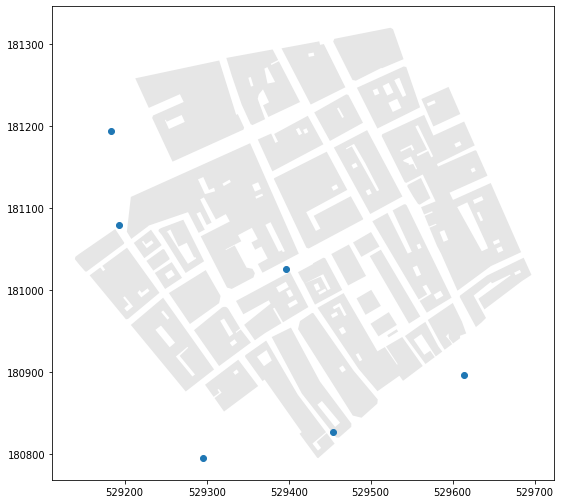

In [12]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['geometry'].plot(ax=ax)

In [13]:
points = np.vstack([pumps['x'], pumps['y']])

In [14]:
type(points)

numpy.ndarray

In [15]:
points

array([[529396.53939544, 529192.53786754, 529183.73976627,
        529613.20523815, 529453.5859949 , 529296.10441902],
       [181025.06304746, 181079.39137965, 181193.7350127 ,
        180896.8041212 , 180826.35315203, 180794.84903736]])

In [16]:
points = np.vstack([pumps['x'], pumps['y']]).T  

In [17]:
points

array([[529396.53939544, 181025.06304746],
       [529192.53786754, 181079.39137965],
       [529183.73976627, 181193.7350127 ],
       [529613.20523815, 180896.8041212 ],
       [529453.5859949 , 180826.35315203],
       [529296.10441902, 180794.84903736]])

In [18]:
results = voronoi(points)

In [19]:
type(results)

tuple

In [20]:
type(results[0])

list

In [21]:
type(results[1])

numpy.ndarray

In [22]:
results

([[4, 2, 1, 0, 3],
  [6, 2, 1, 5],
  [7, 1, 0, 8],
  [10, 9, 0, 3],
  [12, 11, 3, 4],
  [13, 14, 4, 2]],
 array([[ 530485.48740599,  182617.47165824],
        [ 529319.69417315,  181146.68564301],
        [ 529265.98390538,  180945.00493156],
        [ 529496.0908641 ,  180946.09921059],
        [ 529355.79616422,  180905.82272847],
        [-166260.98526651,  127625.65350865],
        [-126296.89568525,  -57664.07577014],
        [-166260.98526651,  127625.65350865],
        [ 927233.69731294,  756453.5461831 ],
        [ 927233.69731294,  756453.5461831 ],
        [ 811193.11719627, -457288.78533121],
        [ 811193.11719627, -457288.78533121],
        [ 666206.18883103, -503176.73991833],
        [-126296.89568525,  -57664.07577014],
        [ 666206.18883103, -503176.73991833]]))

In [23]:
regions, vertices = voronoi(points)

In [24]:
print(type(regions))
print(regions)

<class 'list'>
[[4, 2, 1, 0, 3], [6, 2, 1, 5], [7, 1, 0, 8], [10, 9, 0, 3], [12, 11, 3, 4], [13, 14, 4, 2]]


In [25]:
print(type(vertices))
print(vertices)

<class 'numpy.ndarray'>
[[ 530485.48740599  182617.47165824]
 [ 529319.69417315  181146.68564301]
 [ 529265.98390538  180945.00493156]
 [ 529496.0908641   180946.09921059]
 [ 529355.79616422  180905.82272847]
 [-166260.98526651  127625.65350865]
 [-126296.89568525  -57664.07577014]
 [-166260.98526651  127625.65350865]
 [ 927233.69731294  756453.5461831 ]
 [ 927233.69731294  756453.5461831 ]
 [ 811193.11719627 -457288.78533121]
 [ 811193.11719627 -457288.78533121]
 [ 666206.18883103 -503176.73991833]
 [-126296.89568525  -57664.07577014]
 [ 666206.18883103 -503176.73991833]]


In [26]:
#!pip uninstall rtree
#!pip install spatialindex
#!pip install rtree
#!pip install pygeos
#import rtree
#import pygeos

In [27]:
results_df = voronoi_frames(points)

In [28]:
type(results_df)

tuple

In [29]:
type(results_df[0])

geopandas.geodataframe.GeoDataFrame

In [30]:
type(results_df[1])

geopandas.geodataframe.GeoDataFrame

In [31]:
regions_df, vertices_df = voronoi_frames(points)

In [32]:
regions_df

,geometry
0,"POLYGON ((529265.984 180945.005, 529319.694 18..."
1,"POLYGON ((529319.694 181146.686, 529265.984 18..."
2,"POLYGON ((529319.694 181146.686, 529183.740 18..."
3,"POLYGON ((529496.091 180946.099, 529613.205 18..."
4,"POLYGON ((529355.796 180905.823, 529496.091 18..."
5,"POLYGON ((529265.984 180945.005, 529355.796 18..."


In [33]:
vertices_df

,geometry
0,POINT (529396.539 181025.063)
1,POINT (529192.538 181079.391)
2,POINT (529183.740 181193.735)
3,POINT (529613.205 180896.804)
4,POINT (529453.586 180826.353)
5,POINT (529296.104 180794.849)


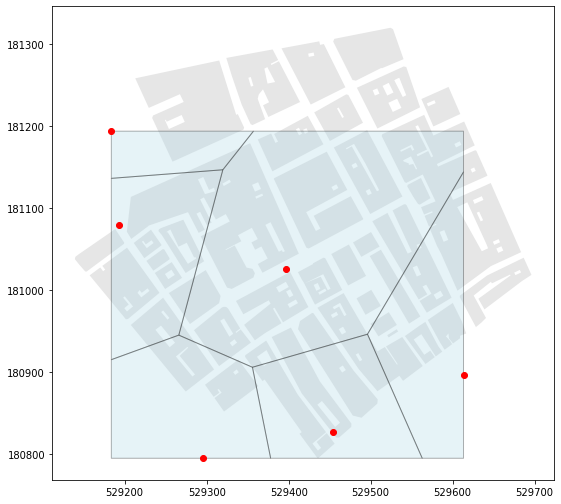

In [34]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
regions_df.plot(ax=ax, color='lightblue',edgecolor='black', alpha=0.3)
vertices_df.plot(ax=ax, color='red')

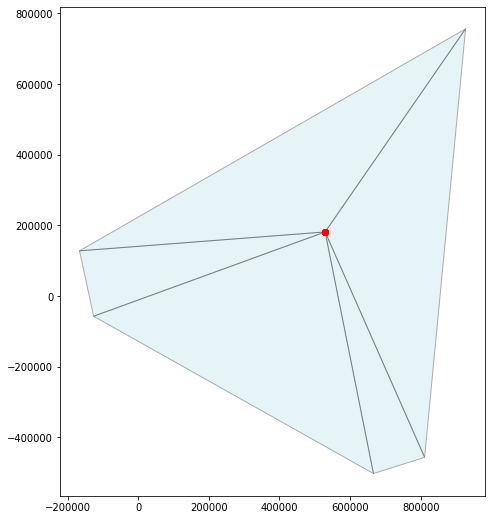

In [35]:
regions_df_noclip, vertices_df_noclip = voronoi_frames(points, clip='none')

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
regions_df_noclip.plot(ax=ax, color='lightblue',edgecolor='black', alpha=0.3)
vertices_df.plot(ax=ax, color='red')

## Plotting

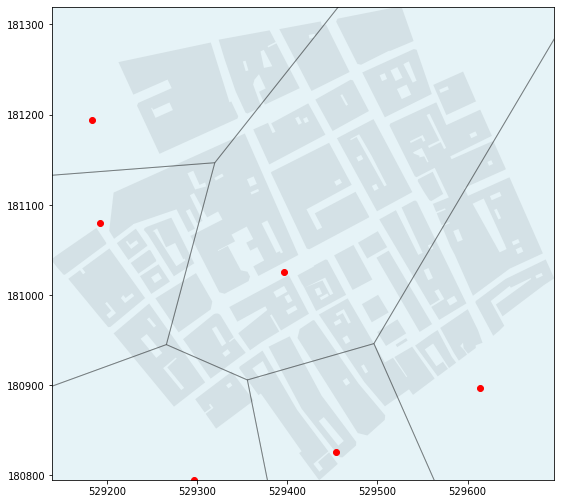

In [36]:
f, ax = plt.subplots(1, figsize=(9, 9))

ax.set_xlim(blocks.total_bounds[0],blocks.total_bounds[2])   #use bounding box of blocks
ax.set_ylim(blocks.total_bounds[1],blocks.total_bounds[3])   #use bounding box of blocks

blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
regions_df_noclip.plot(ax=ax, color='lightblue',edgecolor='black', alpha=0.3)
vertices_df_noclip.plot(ax=ax, color='red')

In [37]:
regions_df_noclip['ID'] = range(0, len(regions_df_noclip))

In [38]:
regions_df_noclip = regions_df_noclip.set_geometry('geometry')

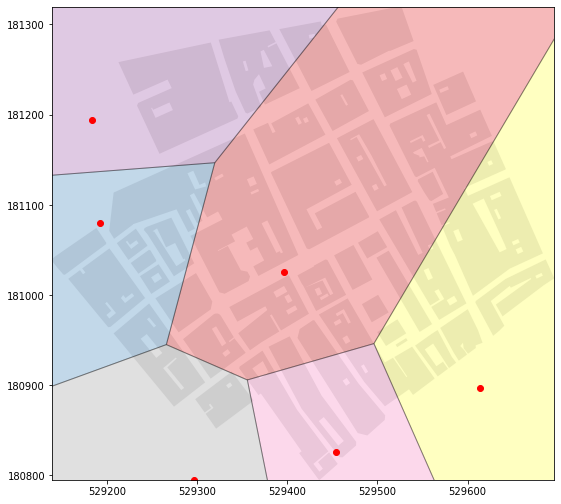

In [39]:
f, ax = plt.subplots(1, figsize=(9, 9))
ax.set_xlim(blocks.total_bounds[0],blocks.total_bounds[2])   #use bounding box of blocks
ax.set_ylim(blocks.total_bounds[1],blocks.total_bounds[3])   #use bounding box of blocks
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)

#use column here with a colourmap 
regions_df_noclip.plot(ax=ax, column='ID', cmap='Set1', edgecolor='black', alpha=0.3)
vertices_df_noclip.plot(ax=ax, color='red')

###### Source: The following individual(s) have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk).